<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/21_1_Time_Series_Multi_Feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

여러 Feature를 사용해서 예측해봅시다

https://www.tensorflow.org/tutorials/structured_data/time_series


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import pandas_datareader.data as web

df = web.DataReader('005930', 'naver', start='2010-01-01', end='2020-12-31')

In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,16060,16180,16000,16180,239271
2010-01-05,16520,16580,16300,16440,559219
2010-01-06,16580,16820,16520,16820,459755
2010-01-07,16820,16820,16260,16260,443237
2010-01-08,16400,16420,16120,16420,295798
...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326
2020-12-24,74100,78800,74000,77800,32502870
2020-12-28,79000,80100,78200,78700,40085044


In [ ]:
df.dtypes

Open      object
High      object
Low       object
Close     object
Volume    object
dtype: object

In [ ]:
import pandas as pd
df=df.apply(pd.to_numeric)

In [ ]:
df.dtypes

Open      int64
High      int64
Low       int64
Close     int64
Volume    int64
dtype: object

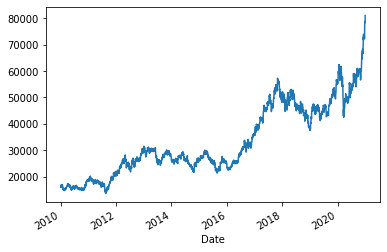

In [ ]:
df.Close.plot()

In [ ]:
TEST_SIZE = 300

train = df[:-TEST_SIZE]
test = df[-TEST_SIZE:]

In [ ]:
import numpy as np
window_size = 20
pred_size = 5

inputs = []
targets = []
for i in range(len(train) - window_size-pred_size):
    inputs.append(np.array(train[i:i+window_size]))
    targets.append(np.array(train.Close[i+window_size:i+window_size+pred_size]))


In [ ]:
inputs[0]

array([[ 16060,  16180,  16000,  16180, 239271],
       [ 16520,  16580,  16300,  16440, 559219],
       [ 16580,  16820,  16520,  16820, 459755],
       [ 16820,  16820,  16260,  16260, 443237],
       [ 16400,  16420,  16120,  16420, 295798],
       [ 16420,  16460,  15940,  15940, 398901],
       [ 15940,  16180,  15900,  16180, 384460],
       [ 16100,  16119,  15940,  15940, 267619],
       [ 16120,  16620,  16000,  16540, 532705],
       [ 16640,  16860,  16580,  16840, 398401],
       [ 16800,  16920,  16560,  16860, 261691],
       [ 17000,  17000,  16440,  16460, 241308],
       [ 16460,  16740,  16460,  16680, 384306],
       [ 16400,  17000,  16400,  17000, 340148],
       [ 16800,  16900,  16360,  16500, 470536],
       [ 16320,  16960,  16300,  16840, 412797],
       [ 16920,  16920,  16240,  16300, 375210],
       [ 16300,  16340,  16000,  16000, 370760],
       [ 16160,  16300,  16060,  16160, 276614],
       [ 16000,  16019,  15600,  15680, 457285]])

In [ ]:
targets[0]

array([15540, 15440, 15540, 15520, 15000])

In [ ]:
df.head(30)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,16060,16180,16000,16180,239271
2010-01-05,16520,16580,16300,16440,559219
2010-01-06,16580,16820,16520,16820,459755
2010-01-07,16820,16820,16260,16260,443237
2010-01-08,16400,16420,16120,16420,295798
2010-01-11,16420,16460,15940,15940,398901
2010-01-12,15940,16180,15900,16180,384460
2010-01-13,16100,16119,15940,15940,267619
2010-01-14,16120,16620,16000,16540,532705


In [ ]:
inputs = np.array(inputs)
targets = np.array(targets)

In [ ]:
print(inputs.shape)
print(targets.shape)

(2389, 20, 5)
(2389, 5)


In [ ]:
window_size = 20
pred_size = 5

test_inputs = []
test_targets = []
for i in range(len(test) - window_size - pred_size):
    test_inputs.append(np.array(test[i:i+window_size]))
    test_targets.append(np.array(test.Close[i+window_size:i+window_size+pred_size]))
test_inputs=np.array(test_inputs)
test_targets = np.array(test_targets)

In [ ]:
print(inputs.shape)
print(targets.shape)
print(test_inputs.shape)
print(test_targets.shape)

(2389, 20, 5)
(2389, 5)
(275, 20, 5)
(275, 5)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.SimpleRNN(20, 
                           input_shape=(20,5),
                           activation='relu', 
                           return_sequences=False)
          )

model.add(layers.Dense(5))
model.add(layers.Reshape([5,1]))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 20)                520       
_________________________________________________________________
dense (Dense)                (None, 5)                 105       
_________________________________________________________________
reshape (Reshape)            (None, 5, 1)              0         
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(inputs, targets, 
                                    epochs=30, 
                                    batch_size=32,
                                    validation_data=(test_inputs, test_targets))

Epoch 1/30
75/75 [==============================] - 1s 8ms/step - loss: 6037356850.5263 - val_loss: 185634521088.0000
Epoch 2/30
75/75 [==============================] - 0s 5ms/step - loss: 6068412058.9474 - val_loss: 47124287488.0000
Epoch 3/30
75/75 [==============================] - 0s 5ms/step - loss: 4008804596.2105 - val_loss: 34778873856.0000
Epoch 4/30
75/75 [==============================] - 0s 5ms/step - loss: 4757623488.0000 - val_loss: 33082503168.0000
Epoch 5/30
75/75 [==============================] - 0s 5ms/step - loss: 2384767693.4737 - val_loss: 28211140608.0000
Epoch 6/30
75/75 [==============================] - 0s 5ms/step - loss: 2524431301.8947 - val_loss: 30845339648.0000
Epoch 7/30
75/75 [==============================] - 0s 5ms/step - loss: 1871647809.2632 - val_loss: 24278632448.0000
Epoch 8/30
75/75 [==============================] - 0s 5ms/step - loss: 1168008047.1579 - val_loss: 19122573312.0000
Epoch 9/30
75/75 [==============================] - 0s 5ms/step

In [ ]:
pred = model.predict(test_inputs)

In [ ]:
pred.shape

(275, 5, 1)

In [ ]:
targets.shape

(2389, 5)

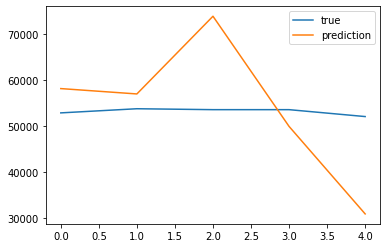

In [ ]:
import matplotlib.pyplot as plt

plt.plot(test_targets[0,:], label = 'true')
plt.plot(pred[0,:,0], label = 'prediction')
plt.legend()

In [ ]:
test_inputs.shape

(275, 20, 5)

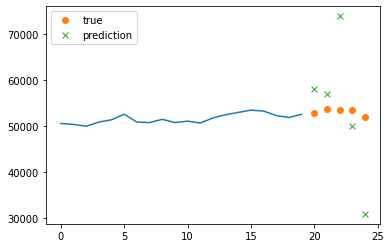

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_inputs[0,:,0])
plt.plot(range(20,25),test_targets[0,:], label = 'true', marker='o',linestyle='None')
plt.plot(range(20,25),pred[0,:,0], label = 'prediction', marker='x',linestyle='None')
plt.legend()